In [1]:
%load_ext lab_black

from puzzles import load
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

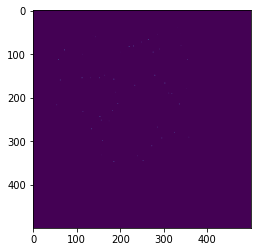

In [2]:
data = load(6)
A = np.zeros([500, 500], dtype=np.uint8)

# data = """1, 1
# 1, 6
# 8, 3
# 3, 4
# 5, 5
# 8, 9"""
# A = np.zeros([12, 12], dtype=np.uint8)

seeds = []
seeds_vals = set()

for i, line in enumerate(data.strip().split("\n")):
    x, y = line.split(", ")
    x, y = int(x), int(y)
    A[y, x] = i + 1
    seeds.append((y, x))
    seeds_vals.add(i + 1)

plt.imshow(A)

In [3]:
from scipy.spatial.distance import cityblock


def get_nearest_seeds(x, y, seeds):
    d_min = 1e9
    for seed in seeds:
        d = cityblock(seed, (y, x))
        if d < d_min:
            d_min = d
            best_seeds = [seed]
        elif d == d_min:
            best_seeds.append(seed)
    return best_seeds

In [5]:
# coloring

for y in tqdm(range(len(A))):
    for x in range(len(A[0])):
        sds = get_nearest_seeds(x, y, seeds)
        if len(sds) > 1:
            continue
        y0, x0 = sds[0]
        A[y, x] = A[y0, x0]

100%|█████████████████████████████████████████| 500/500 [01:49<00:00,  4.59it/s]


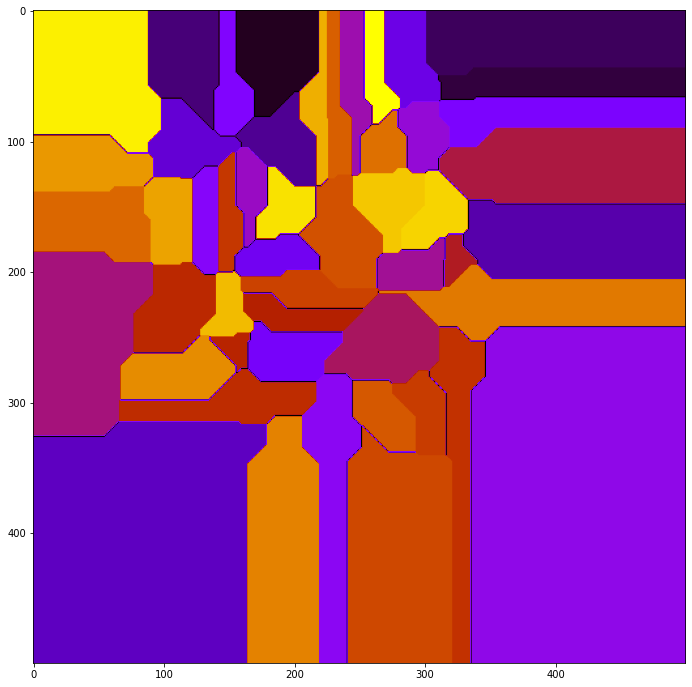

In [8]:
plt.figure(figsize=(12, 12))
plt.imshow(A, cmap="gnuplot")

In [74]:
border_values = (
    set(A[:1].ravel())
    | set(A[-1:].ravel())
    | set(A[:, :1].ravel())
    | set(A[:, -1:].ravel())
) - {0}

border_values

{1,
 2,
 3,
 4,
 6,
 7,
 9,
 12,
 13,
 15,
 16,
 19,
 21,
 23,
 29,
 33,
 36,
 37,
 39,
 40,
 42,
 44,
 49,
 50}

In [75]:
s_max = -1
for seed_val in seeds_vals - border_values:
    s = (A == seed_val).sum()
    if s > s_max:
        s_max = s
s_max

4233

---

In [85]:
from scipy.spatial.distance import cityblock


def get_all_distances(x, y, seeds):
    return sum([cityblock(seed, (y, x)) for seed in seeds])

In [86]:
B = np.zeros_like(A, dtype=np.uint8)
N = 0
for y in tqdm(range(len(A))):
    for x in range(len(A[0])):
        q = int(get_all_distances(x, y, seeds) < 10000)
        N += q
        B[y, x] = q

100%|████████████████████████████████████████| 500/500 [02:49<00:00,  2.95it/s]


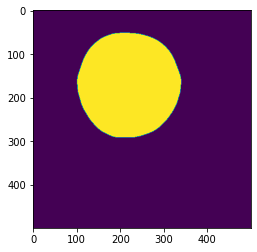

In [87]:
plt.imshow(B)

In [88]:
N

45290